<a href="https://www.kaggle.com/code/niharpatel03/spaceship-titanic-xgboost?scriptVersionId=160756578" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Importing Libraries
* Importing all the required dependencies for the model.

In [1]:
# Importing libraries
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Importing scikit-learn preprocessing libraries
from sklearn.preprocessing import MinMaxScaler

# Importing xgboost modeling libraries
import xgboost as xgb
from catboost import CatBoostClassifier


# 2. Importing Data Files

* Reading the `train.csv` and `test.csv` file from the given data path `"/kaggle/input/spaceship-titanic/train.csv"` and `"/kaggle/input/spaceship-titanic/test.csv"` loading it into variable `X` and `X_test`, using `pd.read_csv` as DataFrame.
* Calculating number of non-null values and data-type of every column in `X`, using `.info()`.

In [2]:
# Read train Data file from the path
X = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Print shape of the data frame
X.shape

(8693, 14)

In [4]:
# Checking non-null values and dtype of each column
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# 3. Visualizing the Raw Data
* Listing down all the column names in `X`.
* Getting Descriptive analysis of `X` using `.describe()` and visualizing using `.hist()`.

In [5]:
X.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

**File and Data Field Descriptions**

* **train.csv** - Personal records for about two-thirds (\~8700) of the passengers, to be used as training data.

    **`PassengerId`** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

    **`HomePlanet`** - The planet the passenger departed from, typically their planet of permanent residence.

    **`CryoSleep`** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

    **`Cabin`** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

    **`Destination`** - The planet the passenger will be debarking to.

    **`Age`** - The age of the passenger.

    **`VIP`** - Whether the passenger has paid for special VIP service during the voyage.
    
    **`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

    **`Name`** - The first and last names of the passenger.

    **`Transported`** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

* **test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

* **sample_submission.csv** - A submission file in the correct format.

    **`PassengerId`** - Id for each passenger in the test set.

    **`Transported`** - The target. For each passenger, predict either True or False.

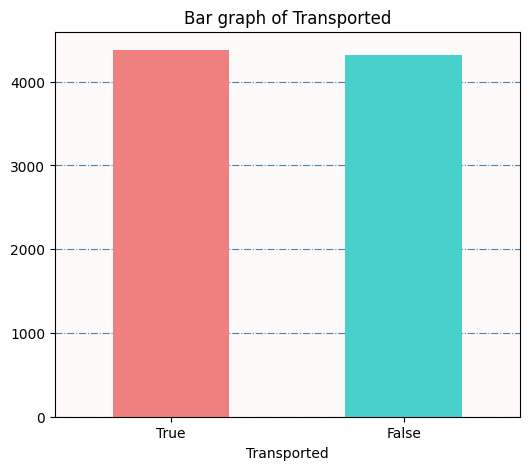

In [6]:
# Visualization of target (Transported) columns
target = "Transported"

fig, ax = plt.subplots(figsize=(6,5))
X[target].value_counts().plot(kind='bar', ax=ax, color=["lightcoral", "mediumturquoise"])
ax.set_title(f"Bar graph of {target}")
ax.tick_params(axis='x', rotation=0)
ax.yaxis.grid(color='steelblue', linestyle="dashdot")
ax.set_facecolor(color="snow")
ax.set_axisbelow(True)

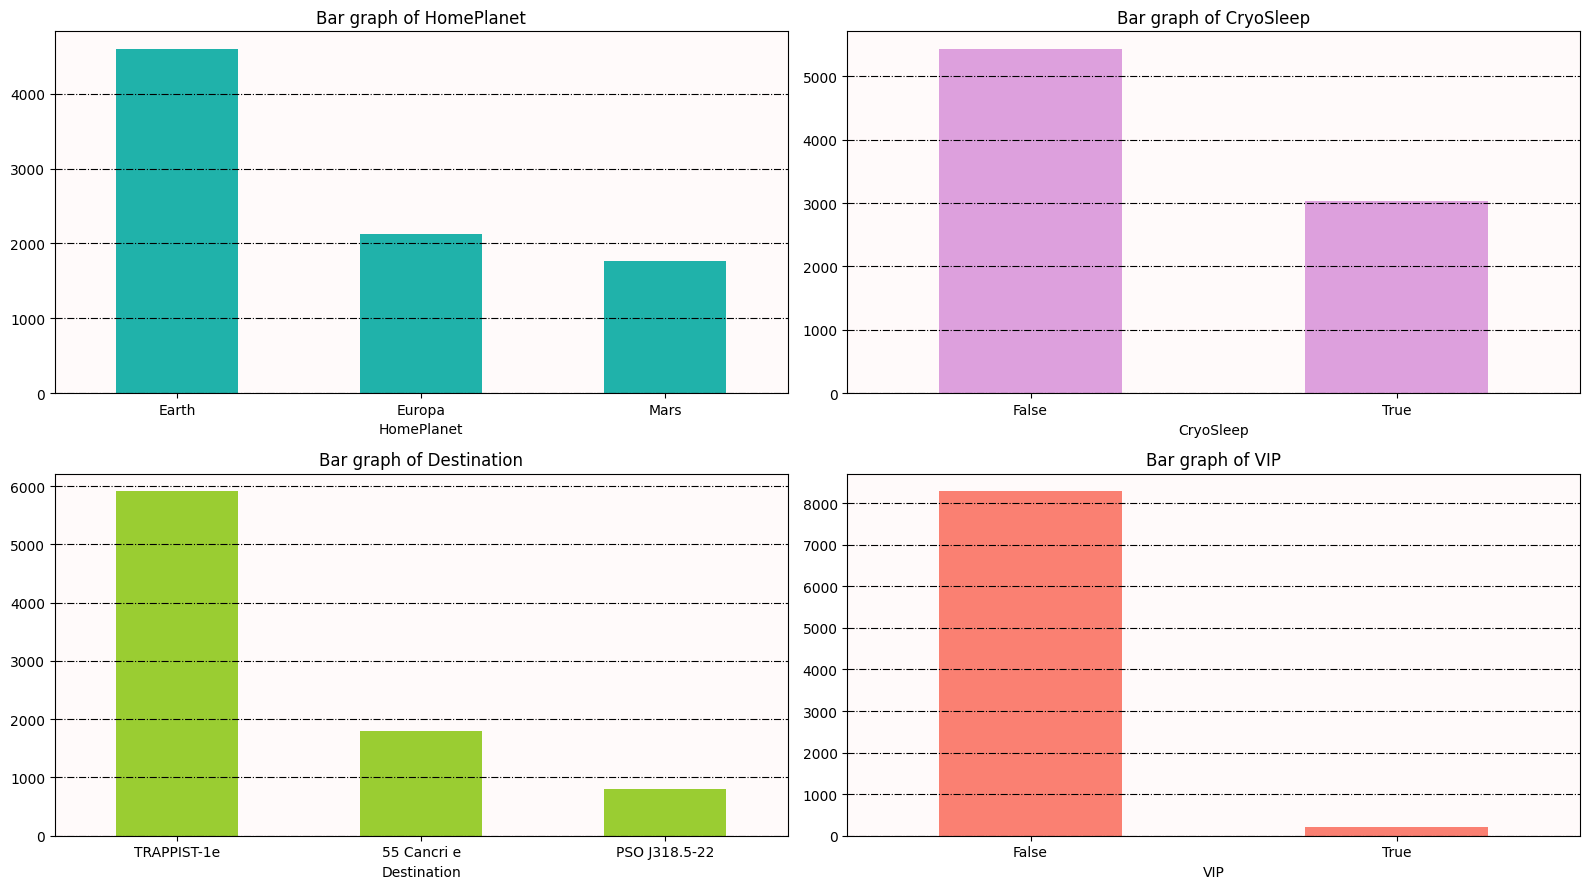

In [7]:
# Visualization of Catagorical columns
cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

fig, ax = plt.subplots(figsize=(16,9), nrows=2, ncols=2)

X[cols[0]].value_counts().plot(kind='bar', ax=ax[0,0], color="lightseagreen")
ax[0, 0].set_title(f"Bar graph of {cols[0]}")
ax[0, 0].tick_params(axis='x', rotation=0)
ax[0, 0].yaxis.grid(color='k', linestyle="dashdot")
ax[0, 0].set_facecolor(color="snow")

X[cols[1]].value_counts().plot(kind='bar', ax=ax[0,1], color="plum")
ax[0, 1].set_title(f"Bar graph of {cols[1]}")
ax[0, 1].tick_params(axis='x', rotation=0)
ax[0, 1].yaxis.grid(color='k', linestyle="dashdot")
ax[0, 1].set_facecolor(color="snow")

X[cols[2]].value_counts().plot(kind='bar', ax=ax[1,0], color="yellowgreen")
ax[1, 0].set_title(f"Bar graph of {cols[2]}")
ax[1, 0].tick_params(axis='x', rotation=0)
ax[1, 0].yaxis.grid(color='k', linestyle="dashdot")
ax[1, 0].set_facecolor(color="snow")

X[cols[3]].value_counts().plot(kind='bar', ax=ax[1,1], color="salmon")
ax[1, 1].set_title(f"Bar graph of {cols[3]}")
ax[1, 1].tick_params(axis='x', rotation=0)
ax[1, 1].yaxis.grid(color='k', linestyle="dashdot")
ax[1, 1].set_facecolor(color="snow")

plt.tight_layout()

In [8]:
# Descriptive statistics of numeric columns
X.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


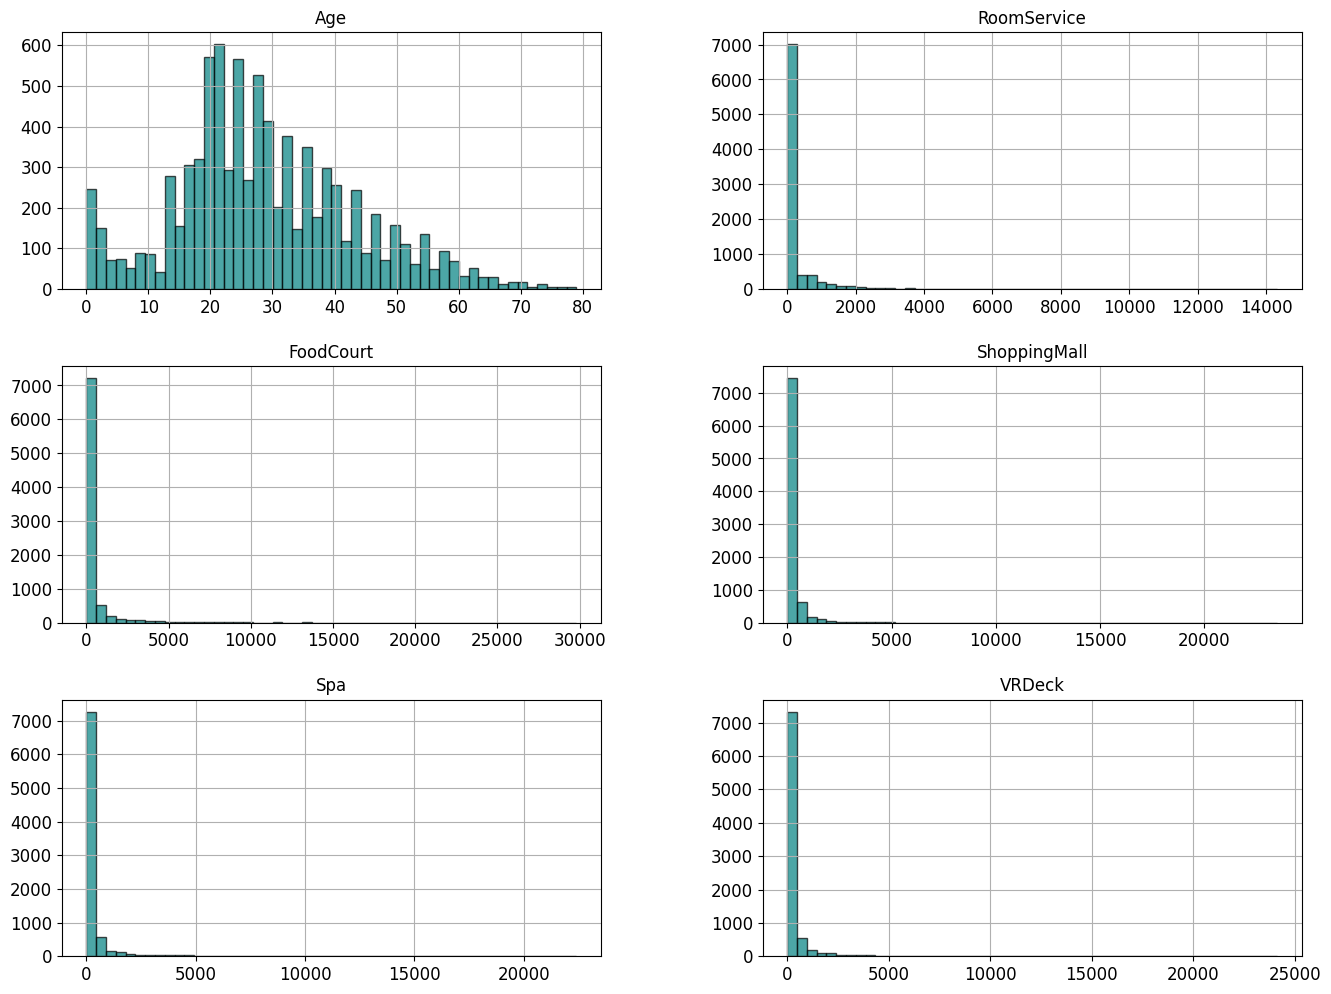

In [9]:
# Histogram of Continious columns
ax = X.hist(figsize=(16,12), bins=50, xlabelsize=12, ylabelsize=12, grid=True, color="teal", edgecolor='black', alpha=0.7);

# 4. Data Pre-processing

* Calculating total number of null values in `X` column wise.
* Dropping unwanted columns from `X` using `.drop()` function.
* Dropping all the records having at least one `NaN` value.
* Checking once again total number of null values in `X`.

In [10]:
# Calculating null values in each column
X.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
# Removing unwanted columns
X.drop(columns=["PassengerId","Name"], inplace=True)

# Removing records having NaN values
X.dropna(inplace=True)

# Re-calculating null values in each column
X.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## (i). Tranforming Data
* Listing down number of unique values and their count, using `.unique()`.
* Transforming every column into one-hot encoded column.

In [12]:
# Printing Unique values and their counts for each column
for i in X.columns:
    print(f"\n{i}")
    print(f"{X[i].unique()}")
    print(f"Count of Unique Values: {X[i].unique().shape[0]}")


HomePlanet
['Europa' 'Earth' 'Mars']
Count of Unique Values: 3

CryoSleep
[False True]
Count of Unique Values: 2

Cabin
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Count of Unique Values: 5413

Destination
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
Count of Unique Values: 3

Age
[39. 24. 58. 33. 16. 44. 26. 35. 14. 45. 32. 48. 28.  0.  1. 49. 10.  7.
 21. 15. 34. 43. 47.  2. 23. 20. 17. 55.  4. 56. 25. 38. 27. 36. 22. 62.
 18. 42. 19. 37. 13.  8. 40.  3. 54.  9.  6. 31. 29. 64. 67. 61. 50. 11.
 51. 41. 30. 46. 60. 63. 57.  5. 79. 68. 59. 74. 12. 65. 53. 71. 52. 75.
 76. 78. 70. 73. 66. 69. 72. 77.]
Count of Unique Values: 80

VIP
[False True]
Count of Unique Values: 2

RoomService
[   0.  109.   43. ... 1003. 8586.  745.]
Count of Unique Values: 1112

FoodCourt
[   0.    9. 3576. ... 1146. 6819. 4688.]
Count of Unique Values: 1318

ShoppingMall
[0.0000e+00 2.5000e+01 3.7100e+02 1.5100e+02 3.0000e+00 1.7000e+01
 5.8900e+02 1.1230e+03 6.5000e+01 1.2000e+01 1.0000e+0

In [13]:
X.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### `HomePlanet`, `CryoSleep`, `Destination`, and `VIP` Columns
* Filtering out all the catagorical columns having `few` number of catagories.
* Converting catagorical columns into one-hot encoded columns, using `.get_dummies`.

In [14]:
# One-hot encoding
X = pd.get_dummies(X, columns=["HomePlanet", "CryoSleep", "Destination", "VIP"], dtype=float)

### `Cabin` Column
* Filtering out all the catagorical columns having `moderate` amount of catagories.
* Spliting the `Cabin` column values to `deck`,`num` and `side` column, to gain better information of each element, using `.split()`.
* Converting only `deck` and `side` columns into one-hot encoded form, using `.get_dummies()`, because `num` column is a `numerical` column.

In [15]:
cabin_col = X["Cabin"]
cabin_col

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 6764, dtype: object

In [16]:
# Spliting Cabin column into 'deck', 'num' and 'side'
deck, num, side = np.array([]), np.array([]), np.array([])

for every_entry in cabin_col:
    temp = str(every_entry).split("/")
    deck = np.append(deck, temp[0])
    num = np.append(num, np.int32(temp[1]))
    side = np.append(side, temp[2])

num = num.astype(np.integer)

X["deck"], X["num"], X["side"] = deck, num, side
X.drop(columns=["Cabin"], inplace=True)

/tmp/ipykernel_19/4169490143.py:10: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  num = num.astype(np.integer)


In [17]:
# Most common value in Cabin columns based on customized method
comman_deck = str(X["deck"].value_counts().first_valid_index())
comman_num = int(np.mean(X["num"]))
comman_side = str(X["side"].value_counts().first_valid_index())
common_val = comman_deck+"/"+str(comman_num)+"/"+comman_side

print(f"The most common occurance based on our algorithm is: {common_val}")

The most common occurance based on our algorithm is: F/598/S


In [18]:
X.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'deck', 'num',
       'side'],
      dtype='object')

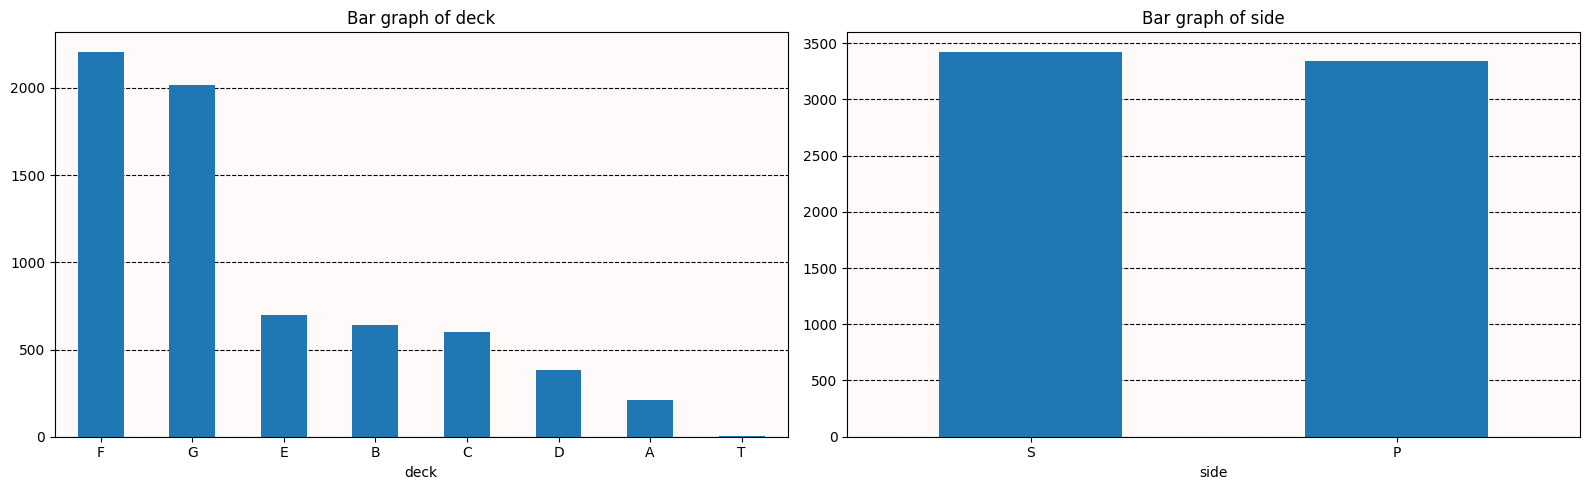

In [19]:
# Visualization of Catagorical columns generated by the Cabin column
cols = ["deck", "side"]

fig, ax = plt.subplots(figsize=(16,5), ncols=2)

X[cols[0]].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title(f"Bar graph of {cols[0]}")
ax[0].tick_params(axis='x', rotation=0)
ax[0].yaxis.grid(linestyle='--', color='k')
ax[0].set_facecolor(color="snow")
ax[0].set_axisbelow(True)

X[cols[1]].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title(f"Bar graph of {cols[1]}")
ax[1].tick_params(axis='x', rotation=0)
ax[1].yaxis.grid(linestyle='--', color='k')
ax[1].set_facecolor(color="snow")
ax[1].set_axisbelow(True)

plt.tight_layout()

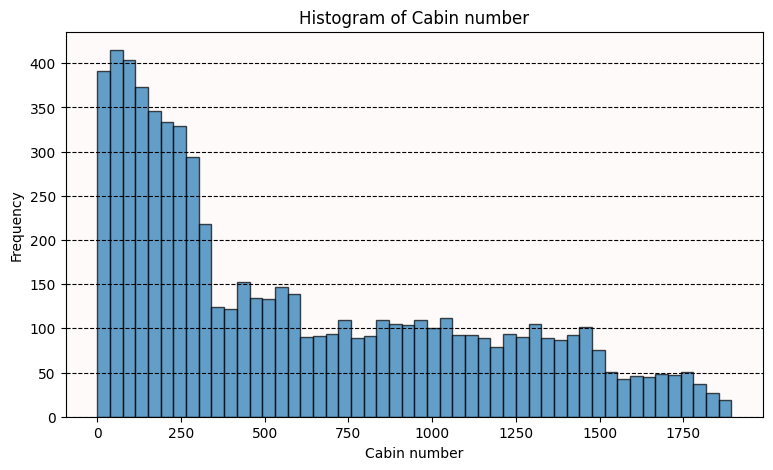

In [20]:
# Visualization of Numerical columns generated by the Cabin column
ax = X["num"].hist(figsize=(9, 5), bins=50, xlabelsize=10, ylabelsize=10, grid=False, edgecolor='black', alpha=0.7)
ax.yaxis.grid(linestyle='--', color='k')
ax.set_xlabel("Cabin number")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Cabin number")
ax.set_facecolor(color="snow");

In [21]:
# Converting Catagorical columns to one-hot encoding form generated from Cabin
X = pd.get_dummies(X, columns=["deck", "side"], dtype=float)
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### `Transported` Column
* Converting the target column `Transported` from `boolean` to `int`.

In [22]:
# Converting target column, from boolean to int
X["Transported"] = X["Transported"].astype(np.int32)

X.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## (ii). Data Spliting
* Seperating the target column `Transported` from `X_train`, to `y_train`, and dropping from the `X_train`.

In [23]:
# Seperating the target column from X_train
y_train = X["Transported"]
X_train = X.drop(columns=["Transported"])

X_train.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## (iii). Data Scaling
* Applying `MinMaxScaler` to scale down all the vlaues in the `X_train`, which will help in modeling and fitting the model efficiently.

In [24]:
cont_col = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "num"]
scaler = MinMaxScaler()
X_train[cont_col] = scaler.fit_transform(X_train[cont_col])

X_train.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.303797,0.010988,0.000302,0.001064,0.024500,0.002164,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.734177,0.004335,0.119948,0.000000,0.299670,0.002410,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.009491,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.202532,0.030544,0.002348,0.006428,0.025214,0.000098,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## (iv.) Test Transform
* Reading `test.csv` and storing the data as a dataframe`X_test`.
* Calculating total null values in each column, from `X_test`.
* Transforming `X_test`, such that there are no records (`PassengerId`) to be droped.
* Data imputation has been done by `.ffill()`.

In [25]:
# Read train Data file from the path
X_test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

passenger_Id = X_test["PassengerId"]
X_test.drop(columns=["PassengerId"], inplace=True)

X_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [26]:
X_test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [27]:
def test_transformer(df_X):
    
    # Removing unwanted columns and NaN valued records
    df_X.drop(columns=["Name"], inplace=True)
    
    # Replacing None cells to NaN values
    df_X.fillna(value=np.nan, inplace=True)

    # Converting catagorical columns to One-Hot Encoded form
    cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
    df_X = pd.get_dummies(df_X, columns=cols, dtype=float)

    df_X.ffill(inplace=True)
    
    # Transforming "Cabin" column
    cabin_col = df_X["Cabin"]
    deck, num, side = np.array([]), np.array([]), np.array([])
    
    for every_entry in cabin_col:
        temp = str(every_entry).split("/")
        deck = np.append(deck, temp[0])
        num = np.append(num, np.int32(temp[1]))
        side = np.append(side, temp[2])

    num = num.astype(np.integer)

    df_X["deck"], df_X["num"], df_X["side"] = deck, num, side
    df_X.drop(columns=["Cabin"], inplace=True)
    
    # Converting catagroical columns to One-Hot Encoded form
    df_X = pd.get_dummies(df_X, columns=["deck", "side"], dtype=float)
    
    return df_X

In [28]:
X_test = test_transformer(X_test)

# Applying scaler transform
X_test[cont_col] = scaler.transform(X_test[cont_col])

/tmp/ipykernel_19/3254332854.py:25: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  num = num.astype(np.integer)


In [29]:
X_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.240506,0.000000,0.000302,0.000000,0.125982,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.392405,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.481013,0.000000,0.223124,0.000000,0.008077,0.028767,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.253165,0.001008,0.000000,0.027030,0.000000,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.430380,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4273,0.531646,0.000000,0.028410,0.000724,0.000446,0.007081,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4274,0.531646,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4275,0.531646,0.000000,0.089894,0.000000,0.000000,0.025718,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# 5. Modeling
* For model selection, the best model to trian with will be `XGBoost`.
## XGBoost Binary Classifier

In [30]:
# Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test)

# Define the parameters for the XGBoost classifier
param = {
    'eta': 0.001, 
    'max_depth': 3,  
    'objective': 'multi:softmax',  
    'num_class': 2} 

steps = 10000  # The number of training iterations

In [31]:
# Train the model
model = xgb.train(param, D_train, steps)

In [32]:
# Predict the labels of the test set
preds = model.predict(D_test)
y_pred = preds

# 6. Creating Submition File
* Converting `y_pred`'s datatype form `int32` to `boolean`.
* Storing `PassengerId` and `Transported` into a dictionary.

In [33]:
y_pred = y_pred.astype(bool)
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [34]:
passenger_Id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [35]:
y_pred.shape

(4277,)

In [36]:
data = {'PassengerId': passenger_Id,
        'Transported': y_pred}

submission = pd.DataFrame(data)
submission.to_csv('/kaggle/working/submission.csv', index=False)
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
